# QEOM FOR EXCITATED STATE

**FRANKLIN MARSHALL FENGA**, franklin.fenga@facsciences-uy1.cm
 * Department of Physics, Faculty of Science, University of Yaoundé I
MAY 2025

Dans ce tutoriel nous allons utiliser le framework Qiskit Nature pour calculer les états excités d'un hamiltonien moléculaire grace a l'algorithme QEOM

### 1-Definition du systeme moléculaire

In [1]:
from qiskit_nature.units import DistanceUnit
from qiskit_nature.second_q.drivers import PySCFDriver

driver = PySCFDriver(
    atom='''B          -0.00002848963418     -1.15089005418998      0.00016113270838;
  N           1.24628355615415     -0.22884255040594     -0.00032994510798
  C           2.51745042824961     -0.60715041985320     -0.00064569936074
  C           3.35671239812905      0.51654146924625     -0.00052079957307
  C           2.54037793161755      1.62398516944414     -0.00013805075806
  C           1.20546941710636      1.15032653512556      0.00001381303227
  C           0.00015028019153      1.83313000747664      0.00028934441484
  C          -1.20523986952894      1.15048011225376      0.00002650229130
  N          -1.24626151204959     -0.22869309008470     -0.00037830061901
  C          -2.51747249607168     -0.60680078410643     -0.00069375055086
  C          -3.35657824829988      0.51701367663738     -0.00061936465198
  C          -2.54008394445905      1.62434136967149     -0.00007057651575
  F          -0.00015536669053     -1.93677224583554      1.13011565513023
  F          -0.00010413212706     -1.93816381300654     -1.12878925681292
  H           2.78195124423350     -1.64731286931933     -0.00083463718238
  H           4.42840772821246      0.49534087232951     -0.00078806335277
  H           2.83086013169733      2.65620590820171      0.00003376608240
  H           0.00024034132861      2.91275288433914      0.00059798743003
  H          -2.78213040743672     -1.64692355787547     -0.00108206380011
  H          -4.42827652681541      0.49597159240337     -0.00066016476491
  H          -2.83042279920712      2.65660045034817     -0.00018580863891''',
    basis="sto3g",
    charge=0,
    spin=0,
    unit=DistanceUnit.ANGSTROM,
)
es_problem= driver.run()

In [2]:
# Quelques propriétés
print(f"Molecule, basis: {driver.basis}, Hartree-Fock calculation")
print(f"Number of alpha electrons: {es_problem.num_alpha}")
print(f"Number of beta electrons: {es_problem.num_beta}")
print(f"Number of spin orbitals: {es_problem.num_spin_orbitals}")
print(f"Spin orbitals occupation: {es_problem.orbital_occupations}")
print(f"Spin orbitals energies: {es_problem.orbital_energies}")
print(f"Molecule reference (HF) total energy: {es_problem.reference_energy} Ha")
print(f"Molecule nuclear repulsion energy: {es_problem.nuclear_repulsion_energy} Ha")


Molecule, basis: sto3g, Hartree-Fock calculation
Number of alpha electrons: 49
Number of beta electrons: 49
Number of spin orbitals: 154
Spin orbitals occupation: [1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0.]
Spin orbitals energies: [-25.80017529 -25.79996277 -15.40110151 -15.40100953 -11.12801908
 -11.09848348 -11.09847251 -11.07059077 -11.07050179 -11.05223935
 -11.0522328  -11.02363094 -11.02362583  -7.45266105  -1.41904737
  -1.3770376   -1.2674361   -1.24697702  -1.05344913  -1.01847788
  -1.00461301  -0.93721018  -0.86161648  -0.76855211  -0.74887273
  -0.74251599  -0.73711592  -0.68543082  -0.66139739  -0.59433611
  -0.57612522  -0.56087973  -0.55591712  -0.54162582  -0.53059202
  -0.52932446  -0.5148049   -0.50156666  -0.48684722  -0.48302422
  -0.47081856  -0.38176598  -0.36596316  -0.36584

In [3]:
# Fermi Level and properties
from pyscf.data import nist
au2ev = nist.HARTREE2EV

print(f"HOMO and LUMO index are {es_problem.num_alpha-1, es_problem.num_alpha}")
print(f"HOMO and LUMO energies in eV are\
{es_problem.orbital_energies[es_problem.num_alpha-1],es_problem.orbital_energies[es_problem.num_alpha] * au2ev}")
print(f"HOMO-LUMO gap in eV is \
{abs(es_problem.orbital_energies[es_problem.num_alpha-1]-es_problem.orbital_energies[es_problem.num_alpha]) * au2ev}")

HOMO and LUMO index are (48, 49)
HOMO and LUMO energies in eV are(-0.22229960569904508, 2.622823328958104)
HOMO-LUMO gap in eV is 8.671903711728612


In [4]:
es_problem.num_particles

(49, 49)

In [5]:
# reduction de l'espace actif 
from qiskit_nature.second_q.transformers import ActiveSpaceTransformer
problem = ActiveSpaceTransformer(4, 4).transform(es_problem) # Utiliser (2,2) pour rendre le calcul moins couteux (+perte précision)problem.num_particles
problem.num_particles


(2, 2)

In [6]:
problem.num_spin_orbitals

8

In [7]:
hamiltonian = problem.hamiltonian # Hamiltonien en 1ere quantification
fermionic_op = hamiltonian.second_q_op() # Hamiltonien fermionique
if len(fermionic_op) <= 20:
    print(fermionic_op)
else: # print the first 20 terms of the fermionic Hamiltonian operator of the molecule
    print("\n".join(str(fermionic_op).splitlines()[:22] + ["..."]))

Fermionic Operator
number spin orbitals=8, number terms=1056
  0.1249745318311886 * ( +_0 +_0 -_0 -_0 )
+ 5.107976713333496e-05 * ( +_0 +_0 -_1 -_0 )
+ -0.0015508414526576731 * ( +_0 +_0 -_2 -_0 )
+ 1.557217145242075e-05 * ( +_0 +_0 -_3 -_0 )
+ 5.107976713333496e-05 * ( +_0 +_1 -_0 -_0 )
+ 0.10861931442994596 * ( +_0 +_1 -_1 -_0 )
+ -0.00021902993345336634 * ( +_0 +_1 -_2 -_0 )
+ 0.00048558200918916037 * ( +_0 +_1 -_3 -_0 )
+ -0.0015508414526576731 * ( +_0 +_2 -_0 -_0 )
+ -0.00021902993345336634 * ( +_0 +_2 -_1 -_0 )
+ 0.10833278569741729 * ( +_0 +_2 -_2 -_0 )
+ 0.00021480277427361855 * ( +_0 +_2 -_3 -_0 )
+ 1.557217145242075e-05 * ( +_0 +_3 -_0 -_0 )
+ 0.00048558200918916037 * ( +_0 +_3 -_1 -_0 )
+ 0.00021480277427361855 * ( +_0 +_3 -_2 -_0 )
+ 0.1164927109752958 * ( +_0 +_3 -_3 -_0 )
+ 0.1249745318311886 * ( +_0 +_4 -_4 -_0 )
+ 5.107976713333496e-05 * ( +_0 +_4 -_5 -_0 )
+ -0.0015508414526576731 * ( +_0 +_4 -_6 -_0 )
+ 1.557217145242075e-05 * ( +_0 +_4 -_7 -_0 )
...


In [8]:
from qiskit_nature.second_q.mappers import JordanWignerMapper, ParityMapper, BravyiKitaevMapper, TaperedQubitMapper

mapper = ParityMapper(num_particles=problem.num_particles)
mapper = problem.get_tapered_mapper(mapper)
Hamil_z2qubit = mapper.map(fermionic_op)

print(f"Number of items in the PM Z2 Pauli list:", len(Hamil_z2qubit))
if len(Hamil_z2qubit) <= 10:
    print(Hamil_z2qubit)
else:
    print(Hamil_z2qubit[0:10])

Number of items in the PM Z2 Pauli list: 325
SparsePauliOp(['IIIIII', 'IIIIIZ', 'IIIIZZ', 'IIIIZI', 'IIIZXZ', 'IIIZXI', 'IIIIXI', 'IIIIXZ', 'IIIXXZ', 'IIIXXI'],
              coeffs=[-1.65371506e+00+0.j,  1.10720189e-01+0.j,  6.30520644e-02+0.j,
  9.87591982e-02+0.j, -1.99539777e-04+0.j, -8.86411466e-05+0.j,
  1.99539777e-04+0.j,  8.86411466e-05+0.j, -1.24001188e-02+0.j,
 -1.25597560e-02+0.j])


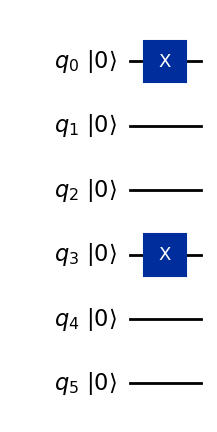

In [9]:
from qiskit_nature.second_q.circuit.library import HartreeFock

HF_state = HartreeFock(problem.num_spatial_orbitals, problem.num_particles, mapper)
HF_state.draw('mpl',initial_state=True)

In [10]:
from qiskit_nature.second_q.circuit.library import UCCSD
from qiskit.primitives import Estimator
from qiskit_algorithms.optimizers import SLSQP
from qiskit_algorithms import VQE
import numpy as np

ansatz = UCCSD(
    problem.num_spatial_orbitals,
    problem.num_particles,
    mapper,
    initial_state = HF_state)

vqe_solver = VQE(Estimator(), ansatz, SLSQP())
vqe_solver.initial_point = np.zeros(ansatz.num_parameters) # Initialisation with zero-qubit

/tmp/ipykernel_78393/3523115678.py:13: DeprecationWarning: The class ``qiskit.primitives.estimator.Estimator`` is deprecated as of qiskit 1.2. It will be removed no earlier than 3 months after the release date. All implementations of the `BaseEstimatorV1` interface have been deprecated in favor of their V2 counterparts. The V2 alternative for the `Estimator` class is `StatevectorEstimator`.
  vqe_solver = VQE(Estimator(), ansatz, SLSQP())


In [11]:
from qiskit_nature.second_q.algorithms import GroundStateEigensolver

# Résultats VQE
GS_VQE = GroundStateEigensolver(mapper, vqe_solver)
GS_VQE_res = GS_VQE.solve(problem)
GS_VQE_res.total_energies[0]

-668.7893540959062

In [12]:
# calcul d'état excité avec Qeom
from qiskit_nature.second_q.algorithms import QEOM
from qiskit_nature.second_q.algorithms.excited_states_solvers.qeom import EvaluationRule

qeom_ES_solver = QEOM(GS_VQE, Estimator(), "sd", EvaluationRule.ALL)
qeom_ES = qeom_ES_solver.solve(problem)
print(qeom_ES)

/tmp/ipykernel_78393/3802868455.py:5: DeprecationWarning: The class ``qiskit.primitives.estimator.Estimator`` is deprecated as of qiskit 1.2. It will be removed no earlier than 3 months after the release date. All implementations of the `BaseEstimatorV1` interface have been deprecated in favor of their V2 counterparts. The V2 alternative for the `Estimator` class is `StatevectorEstimator`.
  qeom_ES_solver = QEOM(GS_VQE, Estimator(), "sd", EvaluationRule.ALL)


=== GROUND STATE ENERGY ===
 
* Electronic ground state energy (Hartree): -1535.49959906638
  - computed part:      -2.42700353787
  - ActiveSpaceTransformer extracted energy part: -1533.07259552851
~ Nuclear repulsion energy (Hartree): 866.710244970474
> Total ground state energy (Hartree): -668.789354095906
 
=== EXCITED STATE ENERGIES ===
 
  1: 
* Electronic excited state energy (Hartree): -1535.405801848474
> Total excited state energy (Hartree): -668.695556878
  2: 
* Electronic excited state energy (Hartree): -1535.31902270194
> Total excited state energy (Hartree): -668.608777731466
  3: 
* Electronic excited state energy (Hartree): -1535.312027218728
> Total excited state energy (Hartree): -668.601782248254
  4: 
* Electronic excited state energy (Hartree): -1535.259561818409
> Total excited state energy (Hartree): -668.549316847935
  5: 
* Electronic excited state energy (Hartree): -1535.223608154932
> Total excited state energy (Hartree): -668.513363184458
  6: 
* Electronic

In [16]:
ET1 = qeom_ES.total_energies[1]
ES1 = qeom_ES.total_energies[2]
 # Calcul des différences d'énergie
s0_energy= -668.7893540959062
qeom_gap = (ET1 - s0_energy) * au2ev  # Gap T1-S0
qeom_f_energy = (ES1 - s0_energy) * au2ev  # Fluorescence S1->S0

print(f'Total QEOM ES energy T1 = {ET1} a.u.')
print(f'Total QEOM ES energy S1 = {ES1} a.u.')
print(f'The bandgap obtained from QEOM calculations (T1-S0) is : {qeom_gap} eV')
print(f'The fluorescence energy obtained from QEOM calculations (S1-S0) is : {qeom_f_energy} eV')

Total QEOM ES energy T1 = -668.6955568780002 a.u.
Total QEOM ES energy S1 = -668.6087777314658 a.u.
The bandgap obtained from QEOM calculations (T1-S0) is : 2.5523523040438003 eV
The fluorescence energy obtained from QEOM calculations (S1-S0) is : 4.913733158876262 eV


In [17]:
# Create the results dataframe*
import pandas as pd
list_results_QEOM = [ET1, ES1, qeom_f_energy, qeom_gap]
dict_results_QEOM = {'QEOM': list_results_QEOM}
df_QEOM = pd.DataFrame(dict_results_QEOM,
                    index = ['ES energy T1 (a.u.)', 'ES energy S1 (a.u.)',
                            'f_energy ES1-ES0 (eV)', 'Gap ES1 - ET1 (eV)'])

df_QEOM

,QEOM
ES energy T1 (a.u.),-668.695557
ES energy S1 (a.u.),-668.608778
f_energy ES1-ES0 (eV),4.913733
Gap ES1 - ET1 (eV),2.552352


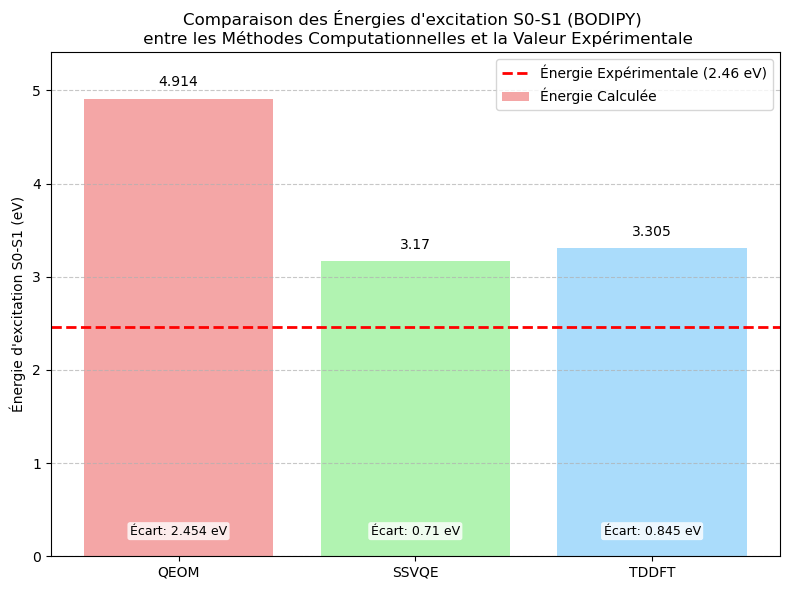

In [2]:
import matplotlib.pyplot as plt
import numpy as np

# Data
methods = ['QEOM', 'SSVQE', 'TDDFT']
calculated_energies = [4.914, 3.17, 3.305]
experimental_energy = 2.460

# Calculate absolute errors
absolute_errors = [abs(e - experimental_energy) for e in calculated_energies]

# Plotting
fig, ax = plt.subplots(figsize=(8, 6))

# Bars for calculated energies
bars = ax.bar(methods, calculated_energies, color=['lightcoral', 'lightgreen', 'lightskyblue'], alpha=0.7, label='Énergie Calculée')

# Line for experimental energy
ax.axhline(y=experimental_energy, color='red', linestyle='--', linewidth=2, label=f'Énergie Expérimentale ({experimental_energy} eV)')

# Annotate bars with calculated values
for bar in bars:
    yval = bar.get_height()
    ax.text(bar.get_x() + bar.get_width()/2, yval + 0.1, round(yval, 3), ha='center', va='bottom', fontsize=10)

# Annotate absolute errors below bars or near the experimental line
for i, method in enumerate(methods):
    ax.text(bars[i].get_x() + bars[i].get_width()/2, 0.2, f'Écart: {round(absolute_errors[i], 3)} eV', ha='center', va='bottom', color='black', fontsize=9, bbox=dict(facecolor='white', alpha=0.8, edgecolor='none', boxstyle='round,pad=0.2'))

ax.set_ylabel('Énergie d\'excitation S0-S1 (eV)')
ax.set_title('Comparaison des Énergies d\'excitation S0-S1 (BODIPY) \n entre les Méthodes Computationnelles et la Valeur Expérimentale')
ax.set_ylim(0, max(calculated_energies) + 0.5)
ax.legend()
ax.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()